# 1. Исследование

In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## 1.1 Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [62]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

/bin/bash: gdown: command not found
/bin/bash: gdown: command not found
/bin/bash: gdown: command not found


In [63]:
train_path = '/kaggle/input/advanced-dls-spring-2021/train.csv'
test_path = '/kaggle/input/advanced-dls-spring-2021/test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [64]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

### 1.1.1 Случайные строки

In [65]:
train.sample(10, random_state=42)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1448,9,45.40,418.8,Male,0,No,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
4792,37,70.35,2552.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
3964,44,100.10,4378.35,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),0
240,25,20.95,495.15,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),0
1942,39,50.75,2011.4,Female,0,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
1859,52,79.20,4016.3,Male,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,0
2348,1,74.40,74.4,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
2280,6,50.80,288.05,Female,0,No,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),1
733,21,68.65,1493.2,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0


In [66]:
train.shape

(5282, 20)

### 1.1.2 Отсутствующие значения

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [68]:
train.isnull().values.any()

False

In [69]:
train.isna().values.any()

False

Пропущенных значений в датасете не видно, но проверим каждый столбец по отдельности

In [70]:
train['ClientPeriod'].value_counts()

ClientPeriod
1     457
72    284
2     165
3     162
4     136
     ... 
57     39
39     35
44     34
36     34
0       9
Name: count, Length: 73, dtype: int64

In [71]:
train['MonthlySpending'].value_counts()

MonthlySpending
20.05    46
19.65    35
19.95    34
20.00    33
19.70    32
         ..
87.30     1
68.90     1
67.20     1
86.30     1
98.20     1
Name: count, Length: 1468, dtype: int64

In [72]:
train['TotalSpent'].value_counts()

TotalSpent
           9
20.2       9
19.75      8
20.05      6
19.65      6
          ..
41.85      1
4326.25    1
950.2      1
4264       1
1375.6     1
Name: count, Length: 4978, dtype: int64

Здесь видно, что в столбце TotalSpent есть 9 пустых значений

In [73]:
train['Sex'].value_counts()

Sex
Male      2655
Female    2627
Name: count, dtype: int64

In [74]:
train['IsSeniorCitizen'].value_counts()

IsSeniorCitizen
0    4440
1     842
Name: count, dtype: int64

In [75]:
train['HasPartner'].value_counts()

HasPartner
No     2705
Yes    2577
Name: count, dtype: int64

In [76]:
train['HasChild'].value_counts()

HasChild
No     3676
Yes    1606
Name: count, dtype: int64

In [77]:
train['HasPhoneService'].value_counts()

HasPhoneService
Yes    4761
No      521
Name: count, dtype: int64

In [78]:
train['HasMultiplePhoneNumbers'].value_counts()

HasMultiplePhoneNumbers
No                  2511
Yes                 2250
No phone service     521
Name: count, dtype: int64

In [79]:
train['HasInternetService'].value_counts()

HasInternetService
Fiber optic    2341
DSL            1800
No             1141
Name: count, dtype: int64

In [80]:
train['HasOnlineSecurityService'].value_counts()

HasOnlineSecurityService
No                     2612
Yes                    1529
No internet service    1141
Name: count, dtype: int64

In [81]:
train['HasOnlineBackup'].value_counts()

HasOnlineBackup
No                     2332
Yes                    1809
No internet service    1141
Name: count, dtype: int64

In [82]:
train['HasDeviceProtection'].value_counts()

HasDeviceProtection
No                     2317
Yes                    1824
No internet service    1141
Name: count, dtype: int64

In [83]:
train['HasTechSupportAccess'].value_counts()

HasTechSupportAccess
No                     2604
Yes                    1537
No internet service    1141
Name: count, dtype: int64

In [84]:
train['HasOnlineTV'].value_counts()

HasOnlineTV
No                     2099
Yes                    2042
No internet service    1141
Name: count, dtype: int64

In [85]:
train['HasMovieSubscription'].value_counts()

HasMovieSubscription
No                     2081
Yes                    2060
No internet service    1141
Name: count, dtype: int64

In [86]:
train['HasContractPhone'].value_counts()

HasContractPhone
Month-to-month    2920
Two year          1280
One year          1082
Name: count, dtype: int64

In [87]:
train['IsBillingPaperless'].value_counts()

IsBillingPaperless
Yes    3148
No     2134
Name: count, dtype: int64

In [88]:
train['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             1786
Mailed check                 1194
Bank transfer (automatic)    1159
Credit card (automatic)      1143
Name: count, dtype: int64

Уберём строки, где пропущены значения в столбце 'TotalSpent'

In [89]:
blanks = train['TotalSpent'] == ' '
train[blanks]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [90]:
train.shape

(5282, 20)

In [91]:
# Убираем лишние строки
train = train[train['TotalSpent'] != ' ']
train.shape

(5273, 20)

In [92]:
# Проверим на наличие дублирующихся данных
train[train.duplicated()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1384,1,69.90,69.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
1474,1,20.05,20.05,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1636,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1959,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
2036,1,69.35,69.35,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
2586,1,20.20,20.2,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,1
2877,1,70.10,70.1,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
2991,1,20.90,20.9,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
3660,1,20.45,20.45,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
3749,1,20.20,20.2,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0


In [93]:
# Уберём дубликаты
train = train.drop_duplicates()
train.shape

(5259, 20)

## 2. Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, если вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 
1) не использовать accuracy как метрику 

2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [94]:
# Информация по столбцам признаков

for i in range(len(feature_cols)):
    display(train[feature_cols[i]].value_counts())
    print('-' * 50)
    print()

ClientPeriod
1     443
72    284
2     165
3     162
4     136
     ... 
49     45
57     39
39     35
44     34
36     34
Name: count, Length: 72, dtype: int64

--------------------------------------------------



MonthlySpending
20.05    45
19.95    34
19.65    34
20.00    32
19.80    32
         ..
65.05     1
73.25     1
95.55     1
98.45     1
98.20     1
Name: count, Length: 1466, dtype: int64

--------------------------------------------------



TotalSpent
19.75     8
20.2      7
20.05     5
19.65     5
19.9      5
         ..
950.2     1
4264      1
24.25     1
1090.6    1
1375.6    1
Name: count, Length: 4977, dtype: int64

--------------------------------------------------



Sex
Male      2643
Female    2616
Name: count, dtype: int64

--------------------------------------------------



IsSeniorCitizen
0    4418
1     841
Name: count, dtype: int64

--------------------------------------------------



HasPartner
No     2690
Yes    2569
Name: count, dtype: int64

--------------------------------------------------



HasChild
No     3662
Yes    1597
Name: count, dtype: int64

--------------------------------------------------



HasPhoneService
Yes    4740
No      519
Name: count, dtype: int64

--------------------------------------------------



HasMultiplePhoneNumbers
No                  2494
Yes                 2246
No phone service     519
Name: count, dtype: int64

--------------------------------------------------



HasInternetService
Fiber optic    2335
DSL            1793
No             1131
Name: count, dtype: int64

--------------------------------------------------



HasOnlineSecurityService
No                     2603
Yes                    1525
No internet service    1131
Name: count, dtype: int64

--------------------------------------------------



HasOnlineBackup
No                     2323
Yes                    1805
No internet service    1131
Name: count, dtype: int64

--------------------------------------------------



HasDeviceProtection
No                     2308
Yes                    1820
No internet service    1131
Name: count, dtype: int64

--------------------------------------------------



HasTechSupportAccess
No                     2595
Yes                    1533
No internet service    1131
Name: count, dtype: int64

--------------------------------------------------



HasOnlineTV
No                     2090
Yes                    2038
No internet service    1131
Name: count, dtype: int64

--------------------------------------------------



HasMovieSubscription
No                     2069
Yes                    2059
No internet service    1131
Name: count, dtype: int64

--------------------------------------------------



HasContractPhone
Month-to-month    2906
Two year          1272
One year          1081
Name: count, dtype: int64

--------------------------------------------------



IsBillingPaperless
Yes    3137
No     2122
Name: count, dtype: int64

--------------------------------------------------



PaymentMethod
Electronic check             1780
Mailed check                 1180
Bank transfer (automatic)    1157
Credit card (automatic)      1142
Name: count, dtype: int64

--------------------------------------------------



### 2.1 Численные признаки

In [95]:
num_data = train[num_cols]
num_data.head()

,ClientPeriod,MonthlySpending,TotalSpent
0,55,19.50,1026.35
1,72,25.85,1872.2
2,1,75.90,75.9
3,32,79.30,2570
4,60,115.25,6758.45


(array([1273.,  548.,  419.,  409.,  368.,  328.,  340.,  364.,  377.,
         833.]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <BarContainer object of 10 artists>)

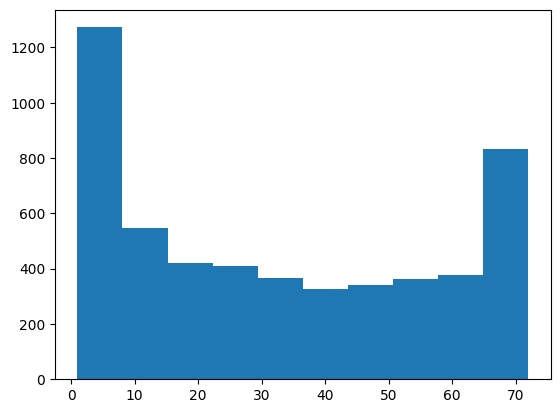

In [96]:
plt.hist(data=num_data, x='ClientPeriod')

(array([1197.,  142.,  265.,  477.,  349.,  656.,  712.,  659.,  573.,
         229.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

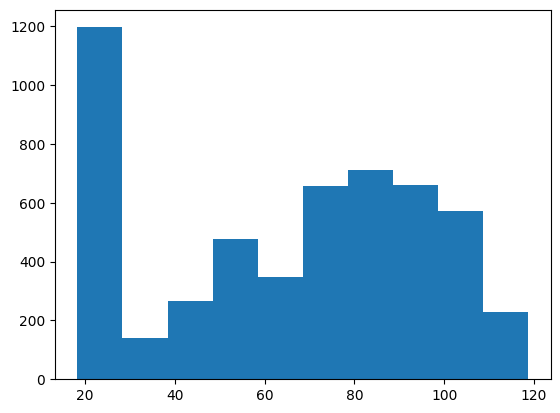

In [97]:
plt.hist(data=num_data, x='MonthlySpending')

(array([559., 559., 533., 539., 518., 519., 518., 512., 503., 499.]),
 array([   0. ,  497.6,  995.2, 1492.8, 1990.4, 2488. , 2985.6, 3483.2,
        3980.8, 4478.4, 4976. ]),
 <BarContainer object of 10 artists>)

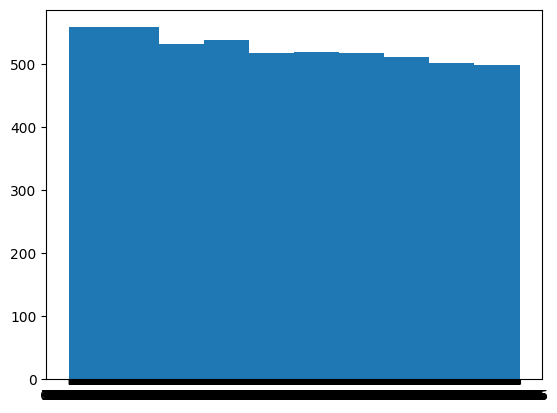

In [98]:
plt.hist(data=num_data, x='TotalSpent')

### 2.2 Категориальные признаки

In [99]:
cat_data = train[cat_cols]
cat_data.head()

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


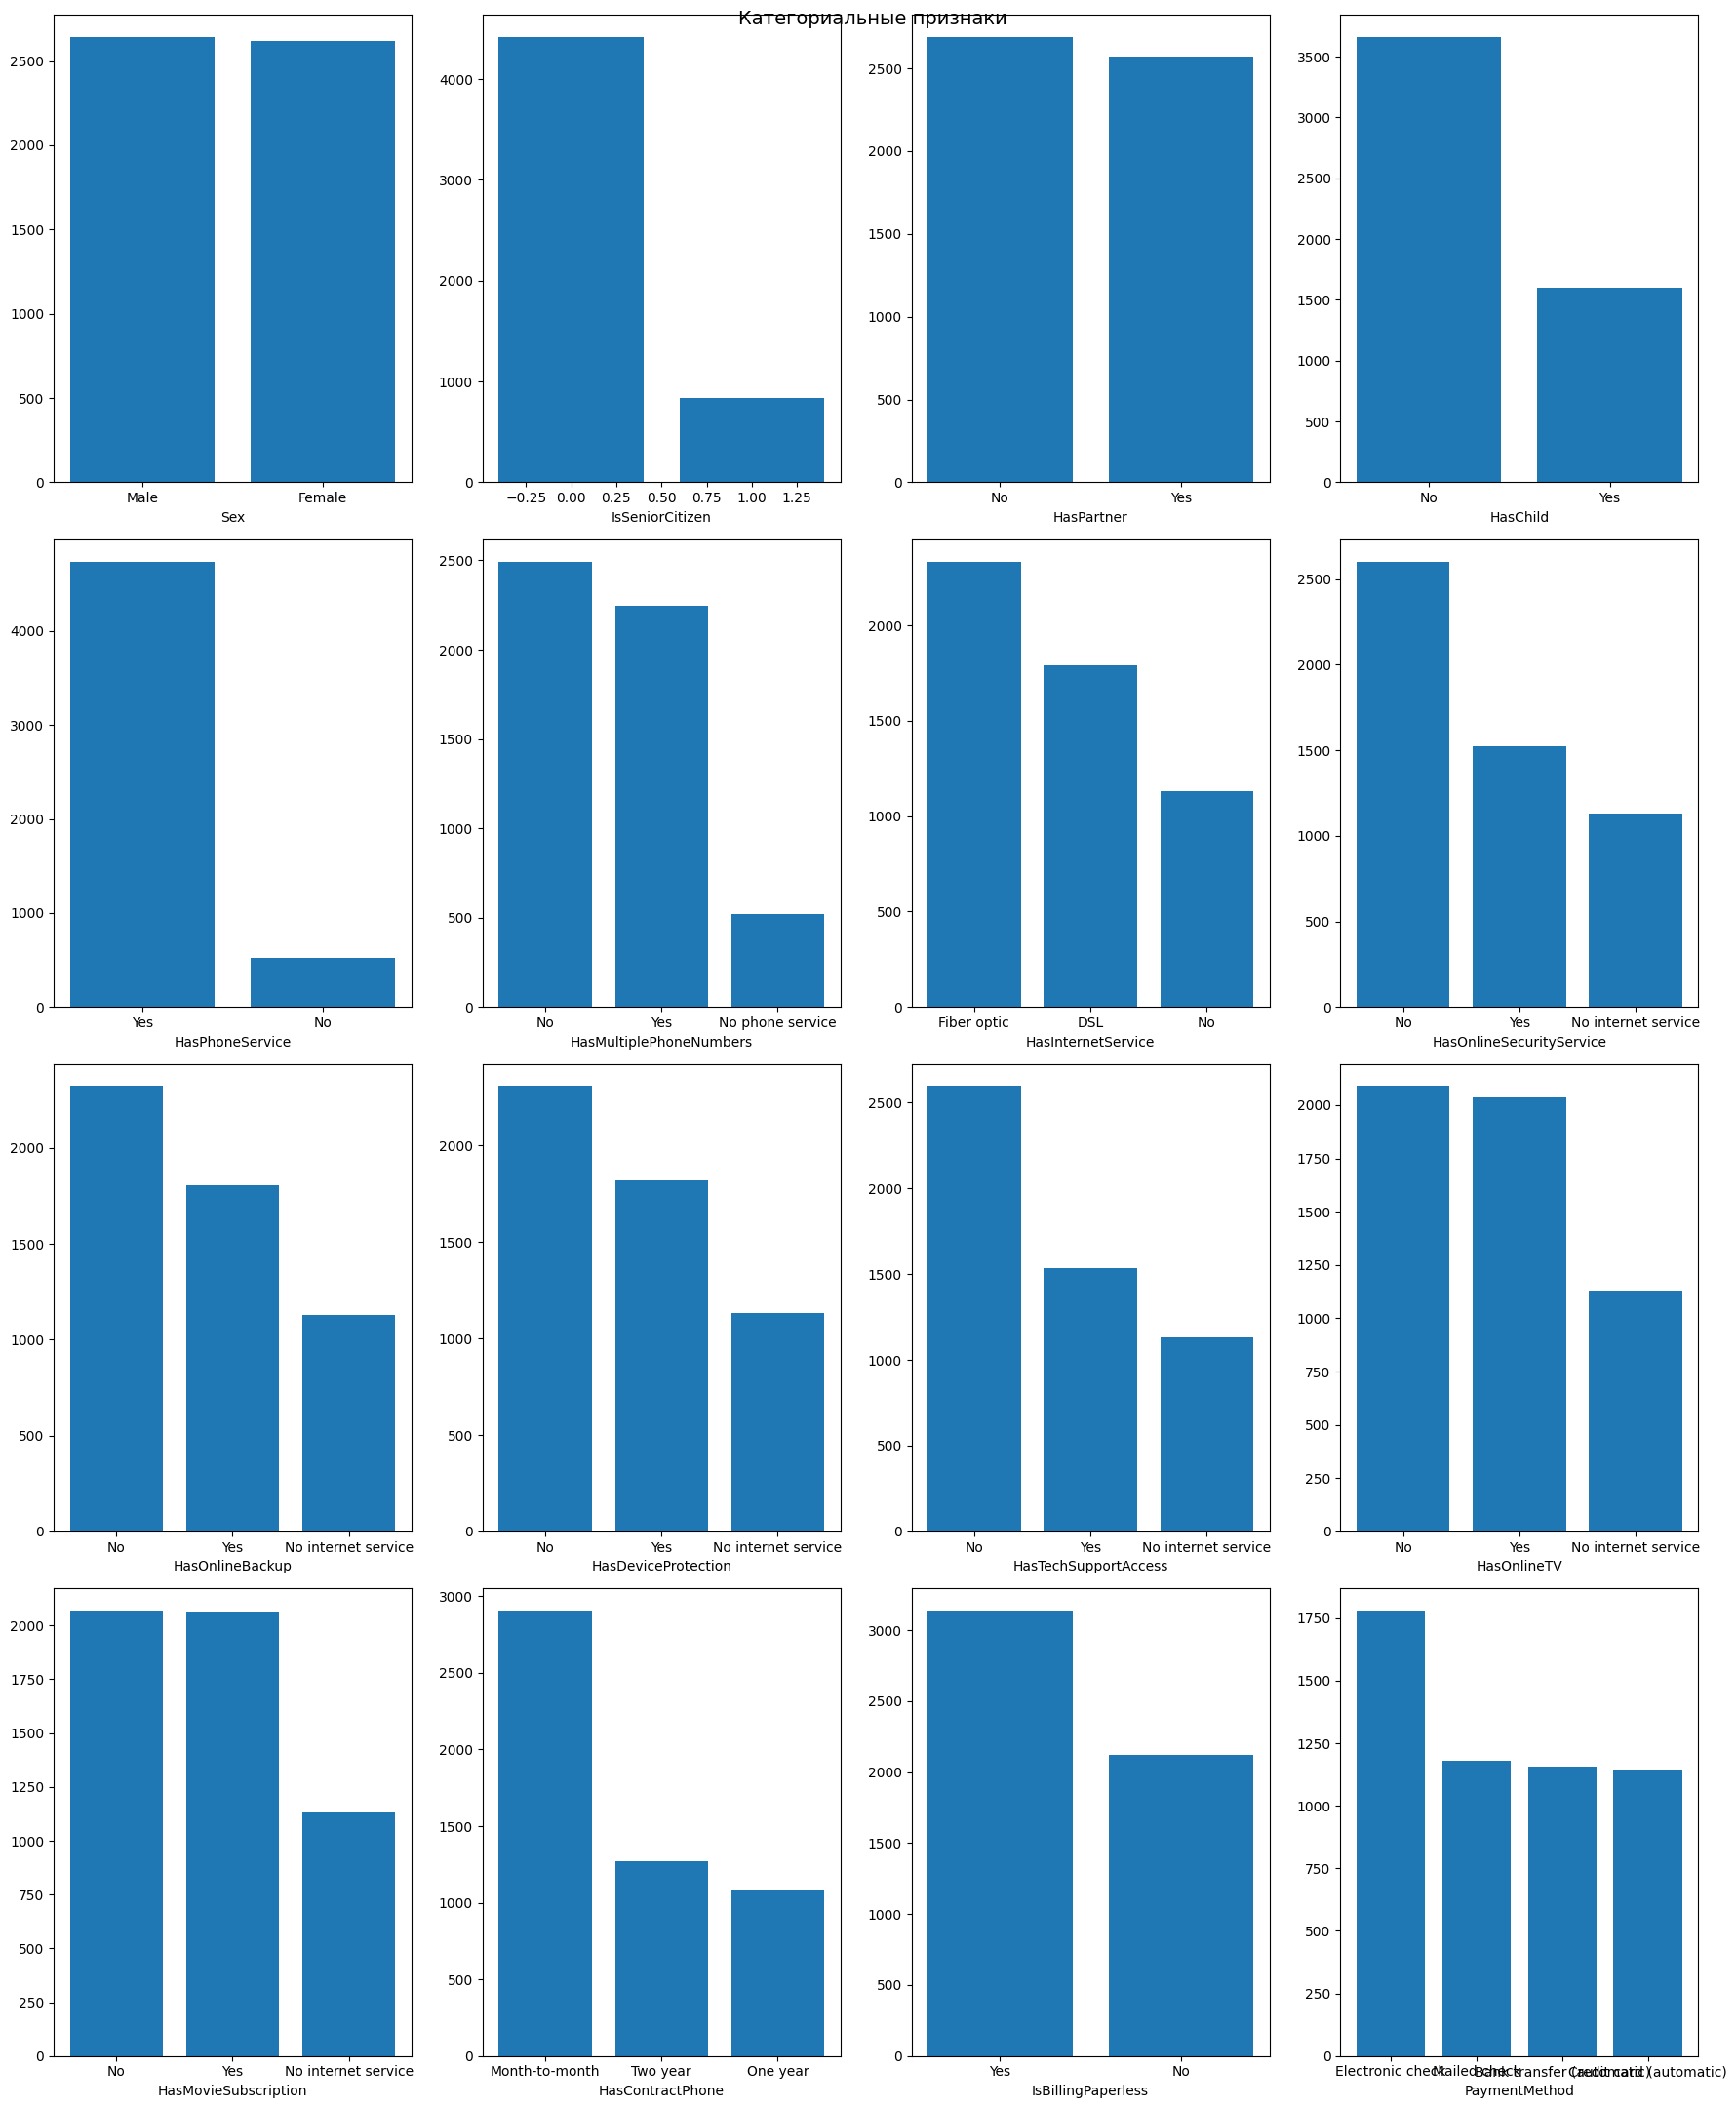

In [100]:
fig = plt.figure(figsize = (18,22))
plt.suptitle("Категориальные признаки", fontsize = 14)
j = 1
for i in range(len(cat_cols)):
    plt.subplot(4,4,j)
    cat_counts = train[cat_cols[i]].value_counts()
    plt.bar(data=cat_data, x=cat_counts.index, height=cat_counts.values)
    plt.xlabel(cat_cols[i])
    j += 1

plt.tight_layout()
plt.show()

### 2.3 Сбалансированность выборки

In [101]:
# Информация по классам в обучающей выборке:

train['Churn'].value_counts()

Churn
0    3885
1    1374
Name: count, dtype: int64

<Axes: xlabel='Churn'>

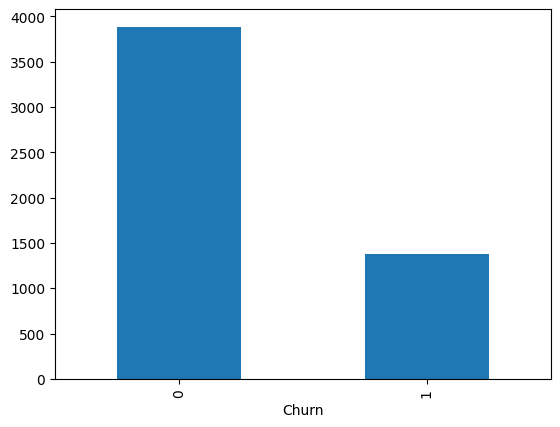

In [102]:
train['Churn'].value_counts().plot.bar()

Видно, что выборка не сбалансирована. Объектов класса 0 почти в 3 раза больше объектов класса 1, значит, лучше использовать в качестве метрики ROC-AUC, т.к. эта метрика нечувствительная к несбалансированным датасетам.

## 3. Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [103]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [104]:
# Разделяем данные
y_train = train[target_col]
x_train = train.drop(target_col, axis=1)

In [105]:
from sklearn.compose import ColumnTransformer

# Нормируем признаки
pipeline = ColumnTransformer([
        ('num_data', StandardScaler(), num_cols),
        ('cat_data', OneHotEncoder(), cat_cols)
    ])

In [106]:
model = make_pipeline(
    pipeline,
    LogisticRegression(random_state=42)
    )

In [107]:
# Подбираем гиперпараметры:

param_grid = {
    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

logreg_model = GridSearchCV(model, 
                            param_grid, 
                            cv=10, 
                            verbose=0, 
                            scoring='roc_auc', 
                            refit=True)

In [108]:
logreg_model.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_data',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('cat_data',
                                                                         OneHotEncoder(),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurityService',
                                                                          'HasO...
                                                                          'HasDeviceProtection',
                                                                          'HasTechSupportAccess',
                                                                          'HasOnlineTV',
                                                                          'HasMovieSubscription',
                                                                          'HasContractPhone',
                                                                          'IsBillingPaperless',
                                                                          'PaymentMethod'])])),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logisticregression__C': [100, 10, 1, 0.1, 0.01,
                                                   0.001],
                         'logisticregression__solver': ['newton-cg', 'lbfgs',
                                                        'liblinear', 'sag',
                                                        'saga']},
             scoring='roc_auc')

In [109]:
logreg_model.best_score_

0.8441923970487609

In [110]:
logreg_model.best_params_

{'logisticregression__C': 100, 'logisticregression__solver': 'sag'}

## 4. Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [111]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [112]:
from catboost import CatBoostClassifier,Pool

In [113]:
#делим выборку на обучающую и тестовую
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [114]:
# CatBoost без настройки параметров
simpleboostmodel = CatBoostClassifier()
simpleboostmodel.fit(X_train, y_train, eval_set=(X_val, y_val),cat_features=cat_cols, verbose=False)

In [115]:
simple_boost_preds_train = simpleboostmodel.predict_proba(X_train)[:,1]

In [116]:
from sklearn.metrics import roc_auc_score

# ROC-AUC обучающей выборке:
roc_auc_score(y_train, simple_boost_preds_train)

0.8710401613187174

In [117]:
simple_boost_preds = simpleboostmodel.predict_proba(X_val)[:,1]

In [118]:
# ROC-AUC на валидационной выборке
roc_auc_score(y_val, simple_boost_preds)

0.8239061600460564

In [119]:
upd_boost_model = CatBoostClassifier(
    loss_function = 'Logloss',
    cat_features=cat_cols,
    bootstrap_type = 'Bayesian',
    random_seed = 42,
    verbose=False,
    eval_metric = 'AUC:hints=skip_train~false',
    bagging_temperature=1)

In [121]:
# Подбор гиперпараметров:

search_catboost= upd_boost_model.grid_search({'max_depth': [2],
                     'learning_rate': np.linspace(0.01, 0.1, 20),
                     'l2_leaf_reg': [1],
                     'iterations'    : [700,900],
                     'random_strength': [2,5]},
                     X_train,
                     y_train,
                     cv=10)


bestTest = 0.8620902907
bestIteration = 696

0:	loss: 0.8620903	best: 0.8620903 (0)	total: 2.77s	remaining: 3m 38s

bestTest = 0.863523922
bestIteration = 660

1:	loss: 0.8635239	best: 0.8635239 (1)	total: 5.65s	remaining: 3m 40s

bestTest = 0.864535897
bestIteration = 548

2:	loss: 0.8645359	best: 0.8645359 (2)	total: 8.45s	remaining: 3m 36s

bestTest = 0.8625681678
bestIteration = 697

3:	loss: 0.8625682	best: 0.8645359 (2)	total: 11.3s	remaining: 3m 33s

bestTest = 0.8632521879
bestIteration = 338

4:	loss: 0.8632522	best: 0.8645359 (2)	total: 14s	remaining: 3m 30s

bestTest = 0.86339274
bestIteration = 287

5:	loss: 0.8633927	best: 0.8645359 (2)	total: 16.9s	remaining: 3m 28s

bestTest = 0.8628164765
bestIteration = 267

6:	loss: 0.8628165	best: 0.8645359 (2)	total: 19.7s	remaining: 3m 25s

bestTest = 0.8622776934
bestIteration = 283

7:	loss: 0.8622777	best: 0.8645359 (2)	total: 22.5s	remaining: 3m 22s

bestTest = 0.8633318341
bestIteration = 357

8:	loss: 0.8633318	best: 0.86453

In [122]:
search_catboost['params']

{'random_strength': 5,
 'depth': 2,
 'l2_leaf_reg': 1,
 'iterations': 900,
 'learning_rate': 0.01473684210526316}

In [124]:
final_catboost_model = CatBoostClassifier(
    depth=2,
    iterations=900,
    eval_metric = 'AUC:hints=skip_train~false',
    l2_leaf_reg = 1,
    learning_rate= 0.01473684210526316,
    cat_features=cat_cols,
    random_seed=42,
    random_strength=2,
    bagging_temperature=1)

In [125]:
final_catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val),cat_features=cat_cols, verbose=False)

In [127]:
pred_final_catboost_model = final_catboost_model.predict_proba(X_train)[:,1]

In [128]:
roc_auc_score(y_train, pred_final_catboost_model)

0.8633761000139147

In [129]:
pred_final_catboost_model_val = final_catboost_model.predict_proba(X_val)[:,1]

In [133]:
roc_auc_score(y_val, pred_final_catboost_model_val)

0.8286618965375441

In [134]:
train_pool = Pool(X_train, y_train, cat_features=cat_cols)

In [136]:
feature_importances = final_catboost_model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

HasContractPhone: 34.66653079641378
ClientPeriod: 15.741457404879007
HasInternetService: 9.78833047339512
HasOnlineSecurityService: 9.082965601945833
HasTechSupportAccess: 6.233284572021685
MonthlySpending: 6.201489429370415
TotalSpent: 5.385680869826064
PaymentMethod: 3.966890880779621
IsBillingPaperless: 3.4205722864586705
IsSeniorCitizen: 2.1044300007926005
HasMultiplePhoneNumbers: 1.3209350799468966
HasOnlineBackup: 0.9474262447735157
HasChild: 0.510573460366847
HasMovieSubscription: 0.4819069777022395
HasDeviceProtection: 0.0827803182921227
HasOnlineTV: 0.05233241780358724
Sex: 0.012413185231986756
HasPhoneService: 0.0
HasPartner: 0.0


# 5. Предсказания

In [137]:
best_model = final_catboost_model

In [138]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [139]:
# Информация по столбцам признаков

for i in range(len(feature_cols)):
    display(test[feature_cols[i]].value_counts())
    print('-' * 50)
    print()

ClientPeriod
1     156
72     78
2      73
4      40
71     39
     ... 
45     12
28     11
59     11
32      9
0       2
Name: count, Length: 73, dtype: int64

--------------------------------------------------



MonthlySpending
19.85     15
20.05     15
20.25     14
20.15     13
19.90     13
          ..
30.35      1
93.80      1
108.80     1
25.50      1
65.60      1
Name: count, Length: 906, dtype: int64

--------------------------------------------------



TotalSpent
19.55      4
20.25      4
45.3       3
19.9       3
2440.25    2
          ..
4138.9     1
3522.65    1
101.45     1
1794.65    1
4566.5     1
Name: count, Length: 1710, dtype: int64

--------------------------------------------------



Sex
Male      900
Female    861
Name: count, dtype: int64

--------------------------------------------------



IsSeniorCitizen
0    1461
1     300
Name: count, dtype: int64

--------------------------------------------------



HasPartner
No     936
Yes    825
Name: count, dtype: int64

--------------------------------------------------



HasChild
No     1257
Yes     504
Name: count, dtype: int64

--------------------------------------------------



HasPhoneService
Yes    1600
No      161
Name: count, dtype: int64

--------------------------------------------------



HasMultiplePhoneNumbers
No                  879
Yes                 721
No phone service    161
Name: count, dtype: int64

--------------------------------------------------



HasInternetService
Fiber optic    755
DSL            621
No             385
Name: count, dtype: int64

--------------------------------------------------



HasOnlineSecurityService
No                     886
Yes                    490
No internet service    385
Name: count, dtype: int64

--------------------------------------------------



HasOnlineBackup
No                     756
Yes                    620
No internet service    385
Name: count, dtype: int64

--------------------------------------------------



HasDeviceProtection
No                     778
Yes                    598
No internet service    385
Name: count, dtype: int64

--------------------------------------------------



HasTechSupportAccess
No                     869
Yes                    507
No internet service    385
Name: count, dtype: int64

--------------------------------------------------



HasOnlineTV
No                     711
Yes                    665
No internet service    385
Name: count, dtype: int64

--------------------------------------------------



HasMovieSubscription
No                     704
Yes                    672
No internet service    385
Name: count, dtype: int64

--------------------------------------------------



HasContractPhone
Month-to-month    955
Two year          415
One year          391
Name: count, dtype: int64

--------------------------------------------------



IsBillingPaperless
Yes    1023
No      738
Name: count, dtype: int64

--------------------------------------------------



PaymentMethod
Electronic check             579
Mailed check                 418
Bank transfer (automatic)    385
Credit card (automatic)      379
Name: count, dtype: int64

--------------------------------------------------



In [140]:
preds = best_model.predict_proba(test)[:, 1]
submission = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/submission.csv')
submission['Churn'] = preds
submission.to_csv('./my_submission.csv')